# Project 2 Crime Housing


### Import crime housing data

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

crime_housing_df = pd.read_csv('crime-housing-austin-2015.csv')
crime_housing_df

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,...,80%,15%,99%,67%,3%,73%,207%,96%,$590,39%
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,...,70%,15%,99%,51%,104%,20%,64%,21%,$747,33%
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,...,67%,12%,97%,26%,26%,31%,68%,44%,$747,32%
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,...,78%,84%,100%,96%,208%,37%,46%,21%,$786,40%


In [4]:
crime_counts = crime_housing_df.groupby(['Highest_NIBRS_UCR_Offense_Description', 'Zip_Code_Crime']).size().reset_index(name='Crime_Count')

crime_counts

,Highest_NIBRS_UCR_Offense_Description,Zip_Code_Crime,Crime_Count
0,Agg Assault,78613.0,1
1,Agg Assault,78617.0,26
2,Agg Assault,78653.0,1
3,Agg Assault,78660.0,6
4,Agg Assault,78701.0,105
...,...,...,...
254,Theft,78754.0,280
255,Theft,78756.0,257
256,Theft,78757.0,908
257,Theft,78758.0,1721


In [5]:

crime_counts_with_salary = crime_counts.merge(
    crime_housing_df[['Zip_Code_Crime', 'Medianhouseholdincome']].drop_duplicates('Zip_Code_Crime'),
    on='Zip_Code_Crime'
).dropna()

# make medianhouseholdincome a float
crime_counts_with_salary['Medianhouseholdincome'] = crime_counts_with_salary['Medianhouseholdincome'].replace({'\$': '', ',': ''}, regex=True).astype(float)

crime_list = ['Auto Theft', 'Burglary'] # list of crimes we want to use
crime_counts_with_salary  = crime_counts_with_salary[
    crime_counts_with_salary.Highest_NIBRS_UCR_Offense_Description.isin(crime_list)
]
crime_counts_with_salary



<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jobea\AppData\Local\Temp\ipykernel_7904\2369590892.py:7: SyntaxWarning: invalid escape sequence '\$'
  crime_counts_with_salary['Medianhouseholdincome'] = crime_counts_with_salary['Medianhouseholdincome'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,Highest_NIBRS_UCR_Offense_Description,Zip_Code_Crime,Crime_Count,Medianhouseholdincome
7,Auto Theft,78617.0,24,43957.0
8,Burglary,78617.0,53,43957.0
24,Auto Theft,78701.0,72,68152.0
25,Burglary,78701.0,79,68152.0
31,Auto Theft,78702.0,81,34734.0
...,...,...,...,...
238,Burglary,78758.0,365,41792.0
244,Auto Theft,78759.0,53,65672.0
245,Burglary,78759.0,175,65672.0
249,Auto Theft,78739.0,7,126525.0


### Plot both auto theft and burglary

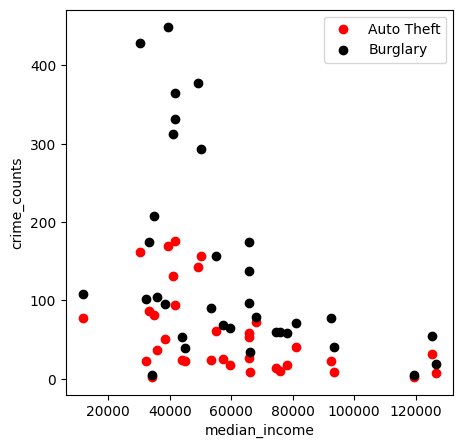

In [6]:
colors = {'Theft':'blue','Auto Theft':'red','Burglary':'black'}

fig, ax = plt.subplots(figsize=(5,5))



for crime in crime_counts_with_salary.Highest_NIBRS_UCR_Offense_Description.unique():
    data = crime_counts_with_salary[crime_counts_with_salary.Highest_NIBRS_UCR_Offense_Description == crime]
    ax.scatter(x=data.Medianhouseholdincome, y=data.Crime_Count, c=colors[crime], label=crime)
ax.set_xlabel('median_income')  
ax.set_ylabel('crime_counts')    
ax.legend()

plt.show()

### Auto theft plot and correlation coefficient

PearsonRResult(statistic=-0.4830635687088004, pvalue=0.003805551256270656)

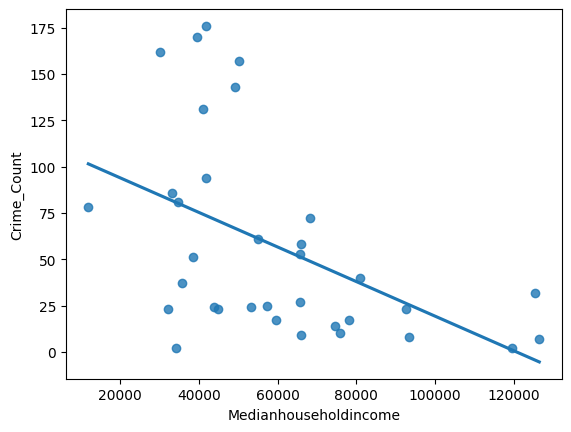

In [7]:
auto_theft = crime_counts_with_salary[crime_counts_with_salary.Highest_NIBRS_UCR_Offense_Description == 'Auto Theft']
sns.regplot(x='Medianhouseholdincome', y='Crime_Count', data=auto_theft, ci=None)
display(stats.pearsonr(auto_theft.Crime_Count, auto_theft.Medianhouseholdincome))

### Burglary plot and correlation coefficient

PearsonRResult(statistic=-0.4733110946186342, pvalue=0.004695545820041506)

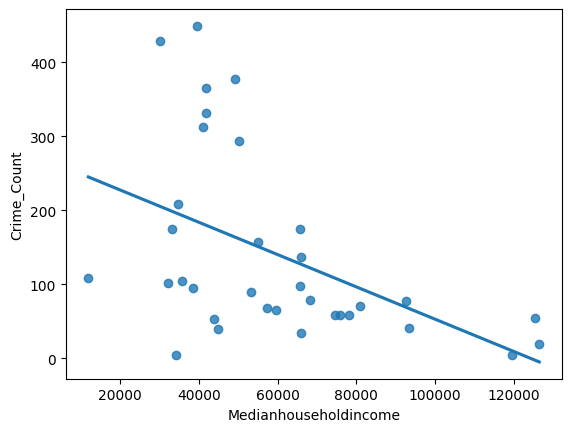

In [8]:
burglary = crime_counts_with_salary[crime_counts_with_salary.Highest_NIBRS_UCR_Offense_Description == 'Burglary']
sns.regplot(x='Medianhouseholdincome', y='Crime_Count', data=burglary, ci=None)
display(stats.pearsonr(burglary.Crime_Count, burglary.Medianhouseholdincome))

### Average number of auto thefts and burglaries per area

'N = 1937 (auto_theft) 4791 (burglary)'

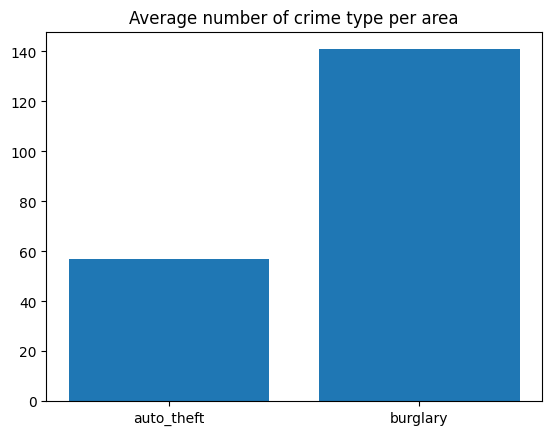

In [15]:
plt.figure()
plt.bar([1,2],[auto_theft.Crime_Count.mean(), burglary.Crime_Count.mean()], tick_label=['auto_theft', 'burglary'])
plt.title('Average number of crime type per area')

display('N = {} (auto_theft) {} (burglary)'.format(sum(auto_theft.Crime_Count), sum(burglary.Crime_Count)))